# Python File I/O

I/O stands for "Input/Output".  Loading files into your programs, parsing the data inside, and being able to use, manipulate, transform, present, and save the results is a very important skillset.

### Reading Files
Python has a few different ways to read files, but for now we'll stick with plain-text files like you'll get from various analysis programs or computational chemistry software packages.  Python can also read binary data files, but that's generally more advanced and requires a bit more experience.

The number one rule to remember for any and all files is that if you **open** it, you must **close** it.  A file that is opened and never closed can either wind up inaccessible to other programs or the user, or the data that was meant to be stored within can be lost.

See the example below.  With the `open` function, we create a **file object** that has several useful internal functions we can take advantage of.  `open()` takes two arguments - the filename first, then the type of action to be taken on the file.  "r" is for "read mode", "w" is for "write mode" which starts at the beginning of the file and writes (including overwriting!), and "a" is for "append mode", which acts like "write mode" except that it adds to the end of the file rather than overwriting it.

In [6]:
myfile = open("test_data/file_reading.txt","r")

contents = myfile.read()

print(type(contents))
print(contents)

myfile.close()

<class 'str'>
This is just a normal text file.
There are words.  There are sentences.  There are lines.  

There was even a blank line.
After this sentence is the end of the file, usually called "EOF".


As you can see, the entire file can be read into a single string, which includes all the line breaks and everything within.  This can be easiest if you have a small file, or if you know exactly the structure of the data inside.

There is also a function that can read one line at a time.  This function, `readline()`, returns the *next* line in the file, up to the newline character, `\n`.  We often use this if the file is large, or if there are multiple line formats in the file (such as we might see in a TeraChem output file), or if we want to keep memory usage low.

In [10]:
myfile = open("test_data/file_reading.txt","r")

contents = myfile.readline()
print(contents)

### We've already read the first line, but if we do the same set of commands again, we'll get the next line

contents = myfile.readline()
print(contents)

### And again, for the third. (see above, the third line is blank!)

contents = myfile.readline()
print(contents)

### Fourth

contents = myfile.readline()
print(contents)

myfile.close()

This is just a normal text file.

There are words.  There are sentences.  There are lines.  



There was even a blank line.



We can also get and keep all the lines in memory stored as a `list`, with each element of the list holding one line of the file as a string.  This uses a function called `readlines()`, which has the `s` at the end to keep it separate from the last function, `readline()`.


In [12]:
myfile = open("test_data/file_reading.txt","r")
all_lines=myfile.readlines()
print(all_lines)
myfile.close()

['This is just a normal text file.\n', 'There are words.  There are sentences.  There are lines.  \n', '\n', 'There was even a blank line.\n', 'After this sentence is the end of the file, usually called "EOF".']


Now you can see all the lines in the file, but presented as a list of strings instead of the formatted text.  With the list structure of the `readlines()` function, you can then do more complicated things to the individual lines by iterating through the list, or choose specific lines with list-slicing like we discussed previously.

In [14]:
for line in all_lines:
    if "There" in line:
        print(line)

There are words.  There are sentences.  There are lines.  

There was even a blank line.



You can also further split up the lines with the `.split()` function available to any string object.

In [15]:
for line in all_lines:
    print(line.split())

['This', 'is', 'just', 'a', 'normal', 'text', 'file.']
['There', 'are', 'words.', 'There', 'are', 'sentences.', 'There', 'are', 'lines.']
[]
['There', 'was', 'even', 'a', 'blank', 'line.']
['After', 'this', 'sentence', 'is', 'the', 'end', 'of', 'the', 'file,', 'usually', 'called', '"EOF".']


With this in mind, can you write a function to search the `TeraChemOutput.out` file (included in the `test_data` folder) for every instance of "RMS grad"?

In [ ]:
### Your code goes here!

Now that you can find all the lines with "RMS grad" in them, can you extract the current value at each line and add it to a dataset?

*Hint:  use the `append` function, and don't forget to convert from a string to a float!*

In [5]:
dataset = []

### Your code goes here!


If you were successful in finding, extracting, and storing the "RMS grad" value for each occurrence in the file, run the next cell to see that data plotted!

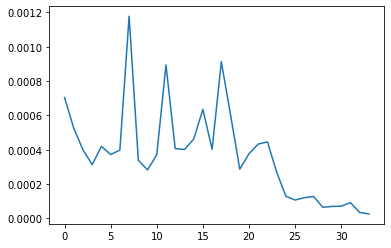

In [6]:
import matplotlib.pyplot as plt
plt.plot(dataset)

You can see how useful parsing datafiles can be, especially when those datafiles aren't as neatly formatted as a CPPTRAJ output, or when there is lots of different kinds of data that you may not need or want at that moment.

But what about writing your own outputs?

### Writing Files

To write to a file, you start in much the same way as reading, except you open the file in "w" or "a" mode.  The file, if it doesn't already exist, will be created on `open` and saved on `close`, so again be sure to close every file you open.

In [7]:
myfile = open("test_data/writing_outputs.txt","w")

myfile.write("This is the text I am writing. ")
myfile.write("Notice how there is no newline after the last sentence... ")
myfile.write("You have to include the newline character explicitly when writing to a file.\n")
myfile.write("\n")
myfile.write("Like that!\n")

myfile.close()


You can also write data with specific formatting, producing nice neat columns of data that can make it easier to read and analyze.  You can use string-formatting to specify the allowed width of sections of a line.

Consider the following set of data:


In [11]:
people = [  {"Name":"Bobby","Age":25,"Class":"First-Year","GPA":3.95},
            {"Name":"Charlie","Age":27,"Class":"Second-Year","GPA":3.87},
            {"Name":"David","Age":26,"Class":"First-Year","GPA":4}]

myfile = open("test_data/people_test.txt","w")
myfile.write(f"{'Name':<20} {'Age':>10} {'Class':<20} {'GPA':>10}\n")
myfile.write("---------------------------------------------------------------\n")
for person in people:
    myfile.write(f"{person['Name']:<20} {person['Age']:>10} {person['Class']:<20} {person['GPA']:>10.4f}\n")
myfile.close()

If you open the file we've just created, it should look like this:

```
Name                        Age Class                       GPA
-------------------- ---------- -------------------- ----------
Bobby                        25 First-Year               3.9500
Charlie                      27 Second-Year              3.8700
David                        26 First-Year               4.0000
```

Notice that the first column is left justified and has empty spaces out to the specified length of 20 characters.  Next, "Age" is right-justified with 10 spaces total.  Class is left-justified again with twenty, and GPA is right-justified *with trailing zeros*, which we specified with the `.4f` addition, indicating we wanted four decimal places and that the value is to be treated like a float.  I also included some blank spaces between each of the variables being printed 1) to show you where each section begins and ends, and 2) to illustrate how you should be careful when using justifications so you don't wind up with Age and Class stuck together as a single value.

Also notice that there is a `\n` character at the end of each line in the code.  This ensures that the text file is properly separated by lines - python won't write what you don't tell it to write.

What if we want to add to a file that already exists?  Simple, use "append mode", or open with "a".

In [12]:
people = [  {"Name":"Esther","Age":24,"Class":"First-Year","GPA":3.96},
            {"Name":"Frances","Age":28,"Class":"Second-Year","GPA":3.99},
            {"Name":"Gloria","Age":27,"Class":"First-Year","GPA":4}]

myfile = open("test_data/people_test.txt","a")
for person in people:
    myfile.write(f"{person['Name']:<20} {person['Age']:>10} {person['Class']:<20} {person['GPA']:>10.4f}\n")
myfile.close()

Now if we reopen the file we created, we can see the addition of the next three people to the list!  This can be useful for things like logging results over the course of a longer calculation, where you might not want the file to be kept open and in memory for the entire time, but still want to add to it on occasion.

File I/O can help you find, organize, and process your data in a way that makes sense to you.